# Analysis on the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 

In [2]:
df=pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
# Remove or alter the null data in dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
df.isnull().mean().sum()

np.float64(0.13716446822248868)

In [5]:
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(df[['Rating']])
df['Rating']=imputer.transform(df[['Rating']])

In [6]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [7]:
df.isnull().sum().mean()

np.float64(1.0)

In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
# Remove $ and convert to float
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
df.rename(columns={'Price':'Price($)'}, inplace=True)

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price($)          float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [15]:
df.duplicated().sum()

np.int64(483)

In [16]:
df.drop_duplicates(inplace=True)

# Numerical Analysis

In [23]:
# average price of the appilcation in the playstore
print("Average price of application in the playstore :- ",df['Price($)'].mean())
# average rating of the application in the playstore
print("Average Rating of application in the playstore :- ",df['Rating'].mean())

Average price of application in the playstore :-  1.0315609897544944
Average Rating of application in the playstore :-  4.188717759562069


In [32]:
df['Rating'].value_counts()

Rating
4.193338    1460
4.400000    1031
4.300000    1016
4.500000     976
4.200000     887
4.600000     768
4.100000     656
4.000000     538
4.700000     484
3.900000     372
3.800000     293
5.000000     271
3.700000     231
4.800000     228
3.600000     169
3.500000     157
3.400000     127
3.300000     101
4.900000      87
3.000000      82
3.100000      69
3.200000      63
2.900000      45
2.800000      40
2.600000      24
2.700000      23
2.300000      20
2.500000      20
2.400000      19
1.000000      16
2.200000      14
1.900000      12
2.000000      12
1.700000       8
1.800000       8
2.100000       8
1.600000       4
1.400000       3
1.500000       3
1.200000       1
Name: count, dtype: int64

In [33]:
df['Price($)'].value_counts()

Price($)
0.00      9584
0.99       144
2.99       125
1.99        73
4.99        70
          ... 
3.61         1
394.99       1
1.26         1
1.20         1
1.04         1
Name: count, Length: 92, dtype: int64

# Categorical Analysis

In [34]:
# Category in playstore
df['Category'].value_counts()

Category
FAMILY                 1939
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         386
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     229
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           64
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: count, dtype: int64

<Axes: ylabel='count'>

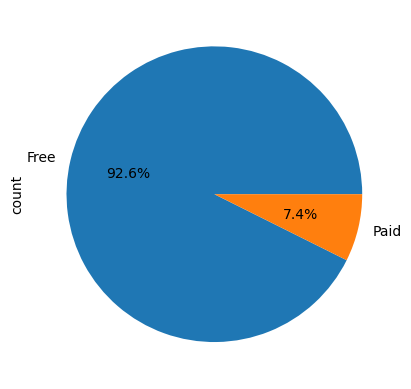

In [36]:
df['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: ylabel='count'>

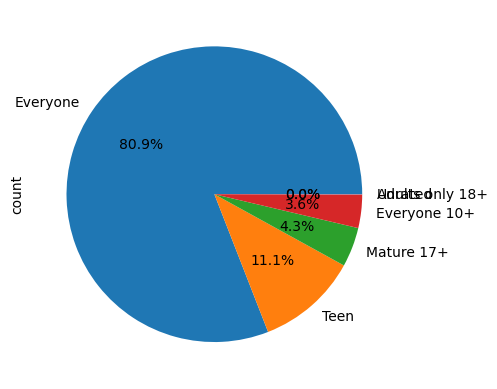

In [40]:
df['Content Rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# Numerical-Categorical Analysis

In [41]:
# application with type and Contentrating 
df.groupby('Type')['Content Rating'].value_counts()

Type  Content Rating 
Free  Everyone           7713
      Teen               1094
      Mature 17+          428
      Everyone 10+        344
      Adults only 18+       3
      Unrated               2
Paid  Everyone            659
      Teen                 52
      Everyone 10+         32
      Mature 17+           19
Name: count, dtype: int64

In [44]:
df.groupby('Content Rating')['Rating'].value_counts()

Content Rating   Rating  
Adults only 18+  3.800000       1
                 4.500000       1
                 4.600000       1
Everyone         4.193338    1283
                 4.400000     816
                             ... 
Teen             2.000000       1
                 2.300000       1
                 2.900000       1
Unrated          4.100000       1
                 4.193338       1
Name: count, Length: 124, dtype: int64